In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")

In [3]:
abalone = pd.read_csv("abalone/abalone.csv")

In [4]:
print("First five rows of the dataset:")
print(abalone.head())

First five rows of the dataset:
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.330     0.200   0.095        0.1840          0.0904          0.0428   
1   I   0.475     0.390   0.169        0.6824          0.2463          0.1383   
2   F   0.545     0.405   0.128        0.7735          0.3456          0.1601   
3   F   0.610     0.490   0.169        1.1654          0.6199          0.2967   
4   F   0.520     0.380   0.145        0.6262          0.2624          0.1228   

   Shell weight  Rings  
0        0.0617      7  
1        0.1844      8  
2        0.2509     13  
3        0.2661     10  
4        0.2131     13  


In [5]:
print("\nDataset dimensions (rows, columns):")
print(abalone.shape)


Dataset dimensions (rows, columns):
(38295, 9)


In [6]:
print("\nMissing values in each column:")
print(abalone.isnull().sum())


Missing values in each column:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


In [7]:
print("\nSummary statistics for numerical variables:")
print(abalone.describe())


Summary statistics for numerical variables:
             Length      Diameter        Height  Whole weight  Shucked weight  \
count  38295.000000  38295.000000  38295.000000  38295.000000    38295.000000   
mean       0.532398      0.414495      0.143926      0.843311        0.365464   
std        0.113254      0.090022      0.037448      0.453208        0.207467   
min        0.140000      0.105000      0.020000      0.014500        0.005000   
25%        0.465000      0.360000      0.120000      0.486200        0.205900   
50%        0.550000      0.430000      0.147000      0.830600        0.347600   
75%        0.615000      0.480000      0.169000      1.137750        0.498000   
max        0.775000      0.620000      0.239000      2.546400        1.237500   

       Viscera weight  Shell weight         Rings  
count    38295.000000  38295.000000  38295.000000  
mean         0.185586      0.243661      9.915394  
std          0.104251      0.129949      2.957454  
min          0.00

In [8]:
print("\nDistribution of Sex category:")
sex_dist = abalone["Sex"].value_counts()
print(sex_dist)
print(f"Percentage: {(sex_dist / len(abalone) * 100).round(2)}")


Distribution of Sex category:
Sex
M    14373
I    12107
F    11815
Name: count, dtype: int64
Percentage: Sex
M    37.53
I    31.62
F    30.85
Name: count, dtype: float64


In [9]:
if not os.path.exists("plots"):
    os.makedirs("plots")

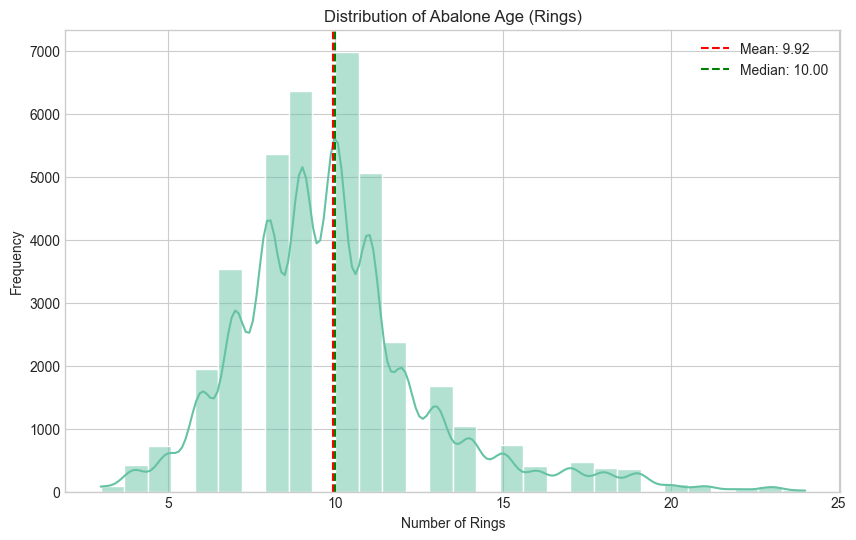

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(abalone["Rings"], bins=30, kde=True)
plt.title("Distribution of Abalone Age (Rings)")
plt.xlabel("Number of Rings")
plt.ylabel("Frequency")
plt.axvline(
    abalone["Rings"].mean(),
    color="red",
    linestyle="--",
    label=f'Mean: {abalone["Rings"].mean():.2f}',
)
plt.axvline(
    abalone["Rings"].median(),
    color="green",
    linestyle="--",
    label=f'Median: {abalone["Rings"].median():.2f}',
)
plt.legend()
plt.savefig("plots/rings_distribution.png")
plt.show()
plt.close()

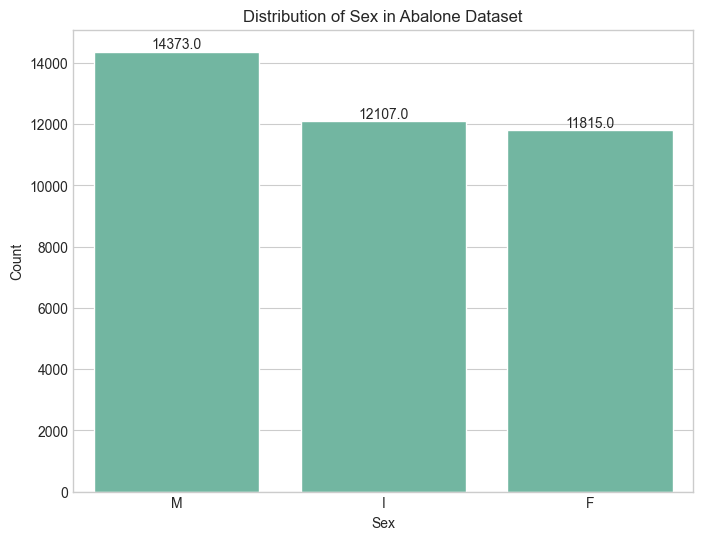

In [11]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Sex", data=abalone)
plt.title("Distribution of Sex in Abalone Dataset")
plt.xlabel("Sex")
plt.ylabel("Count")
# Add count labels on bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
    )
plt.savefig("plots/sex_distribution.png")
plt.show()
plt.close()

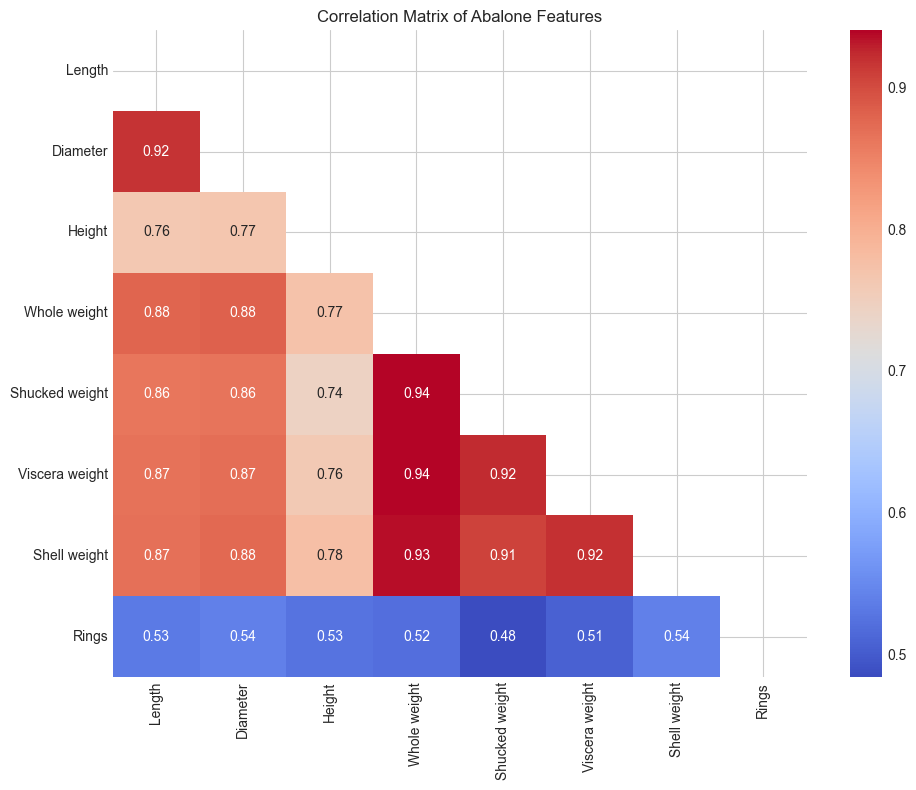

In [12]:
plt.figure(figsize=(10, 8))
numerical_cols = abalone.select_dtypes(include=["float64", "int64"]).columns
correlation = abalone[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)
plt.title("Correlation Matrix of Abalone Features")
plt.tight_layout()
plt.savefig("plots/correlation_matrix.png")
plt.show()
plt.close()

<Figure size 1200x1000 with 0 Axes>

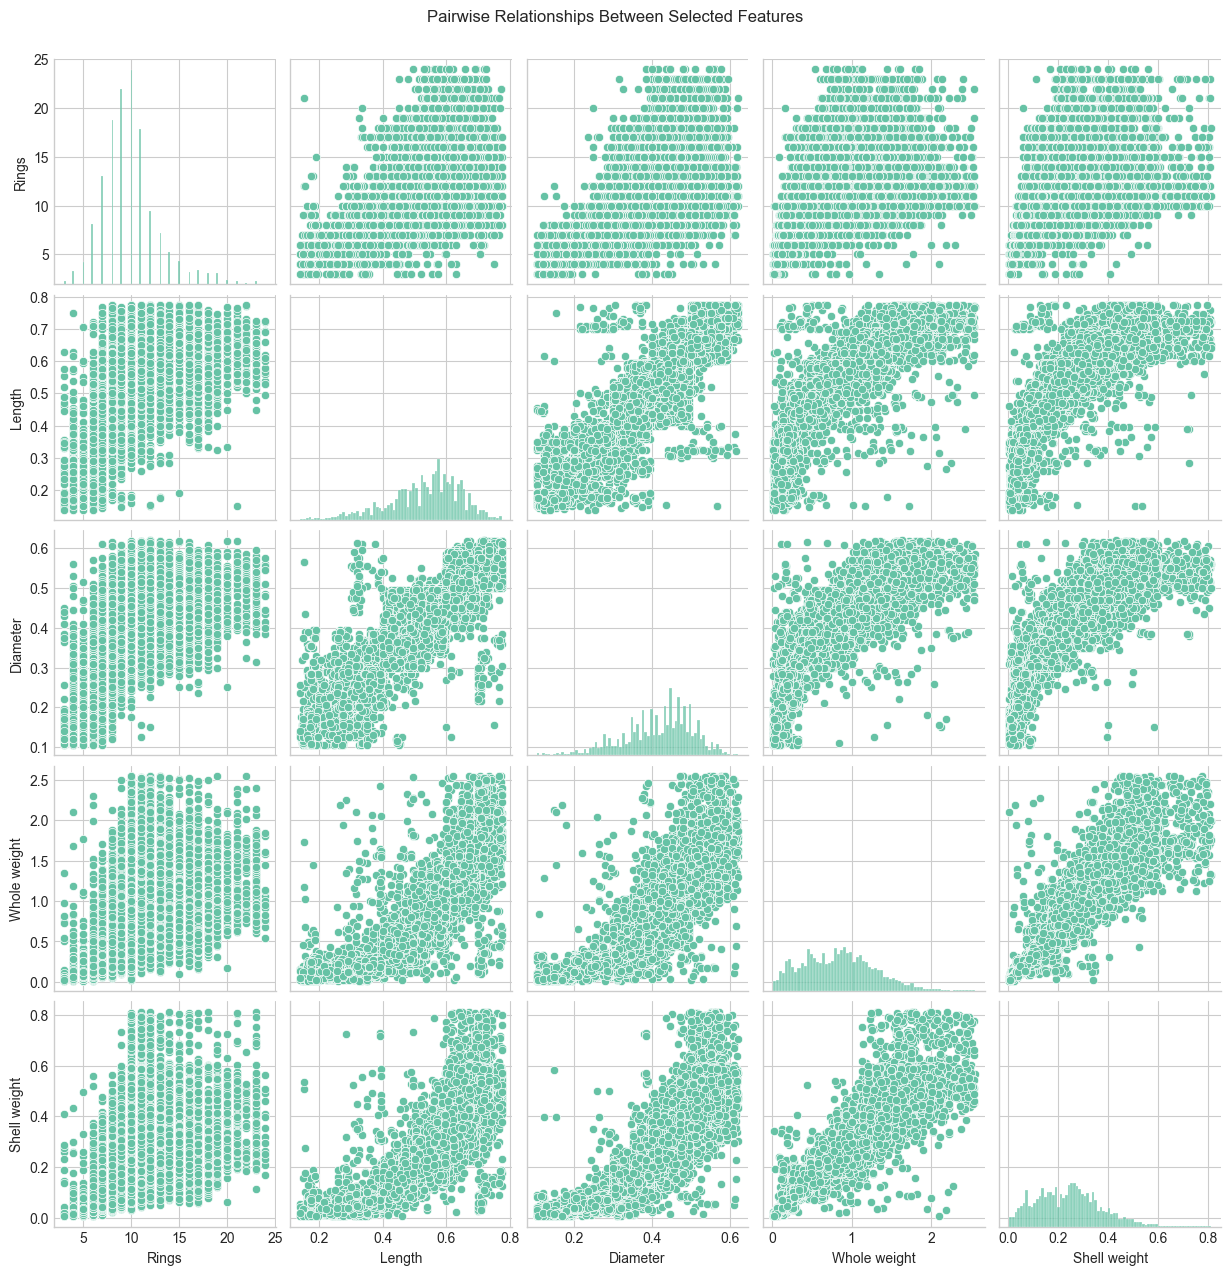

In [13]:
plt.figure(figsize=(12, 10))
selected_features = ["Rings", "Length", "Diameter", "Whole weight", "Shell weight"]
sns.pairplot(abalone[selected_features], height=2.5)
plt.suptitle("Pairwise Relationships Between Selected Features", y=1.02)
plt.savefig("plots/pairplot_selected.png")
plt.show()
plt.close()

/var/folders/f4/dt4yddl54l584rxvvq1zm9fr0000gn/T/ipykernel_94133/1737802150.py:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x="Sex", y="Rings", data=abalone, join=False, color="red")


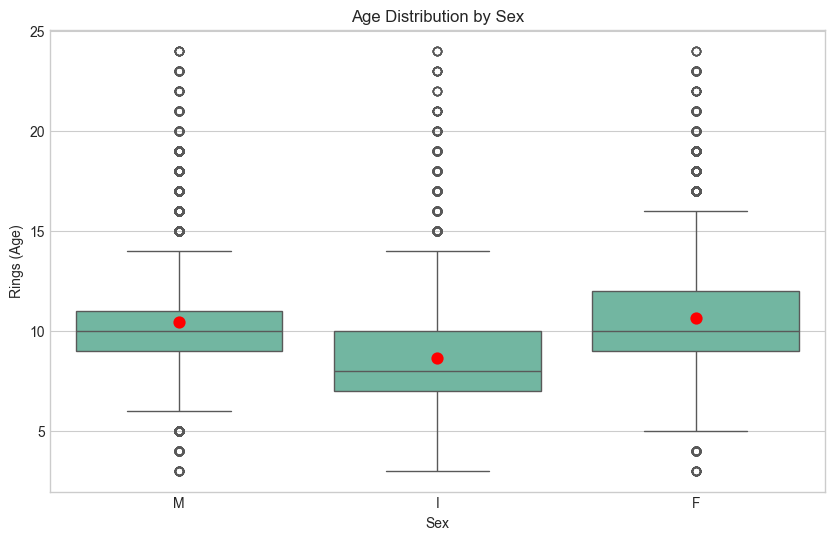

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Sex", y="Rings", data=abalone)
plt.title("Age Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Rings (Age)")
# Add mean points
sns.pointplot(x="Sex", y="Rings", data=abalone, join=False, color="red")
plt.savefig("plots/age_by_sex.png")
plt.show()
plt.close()

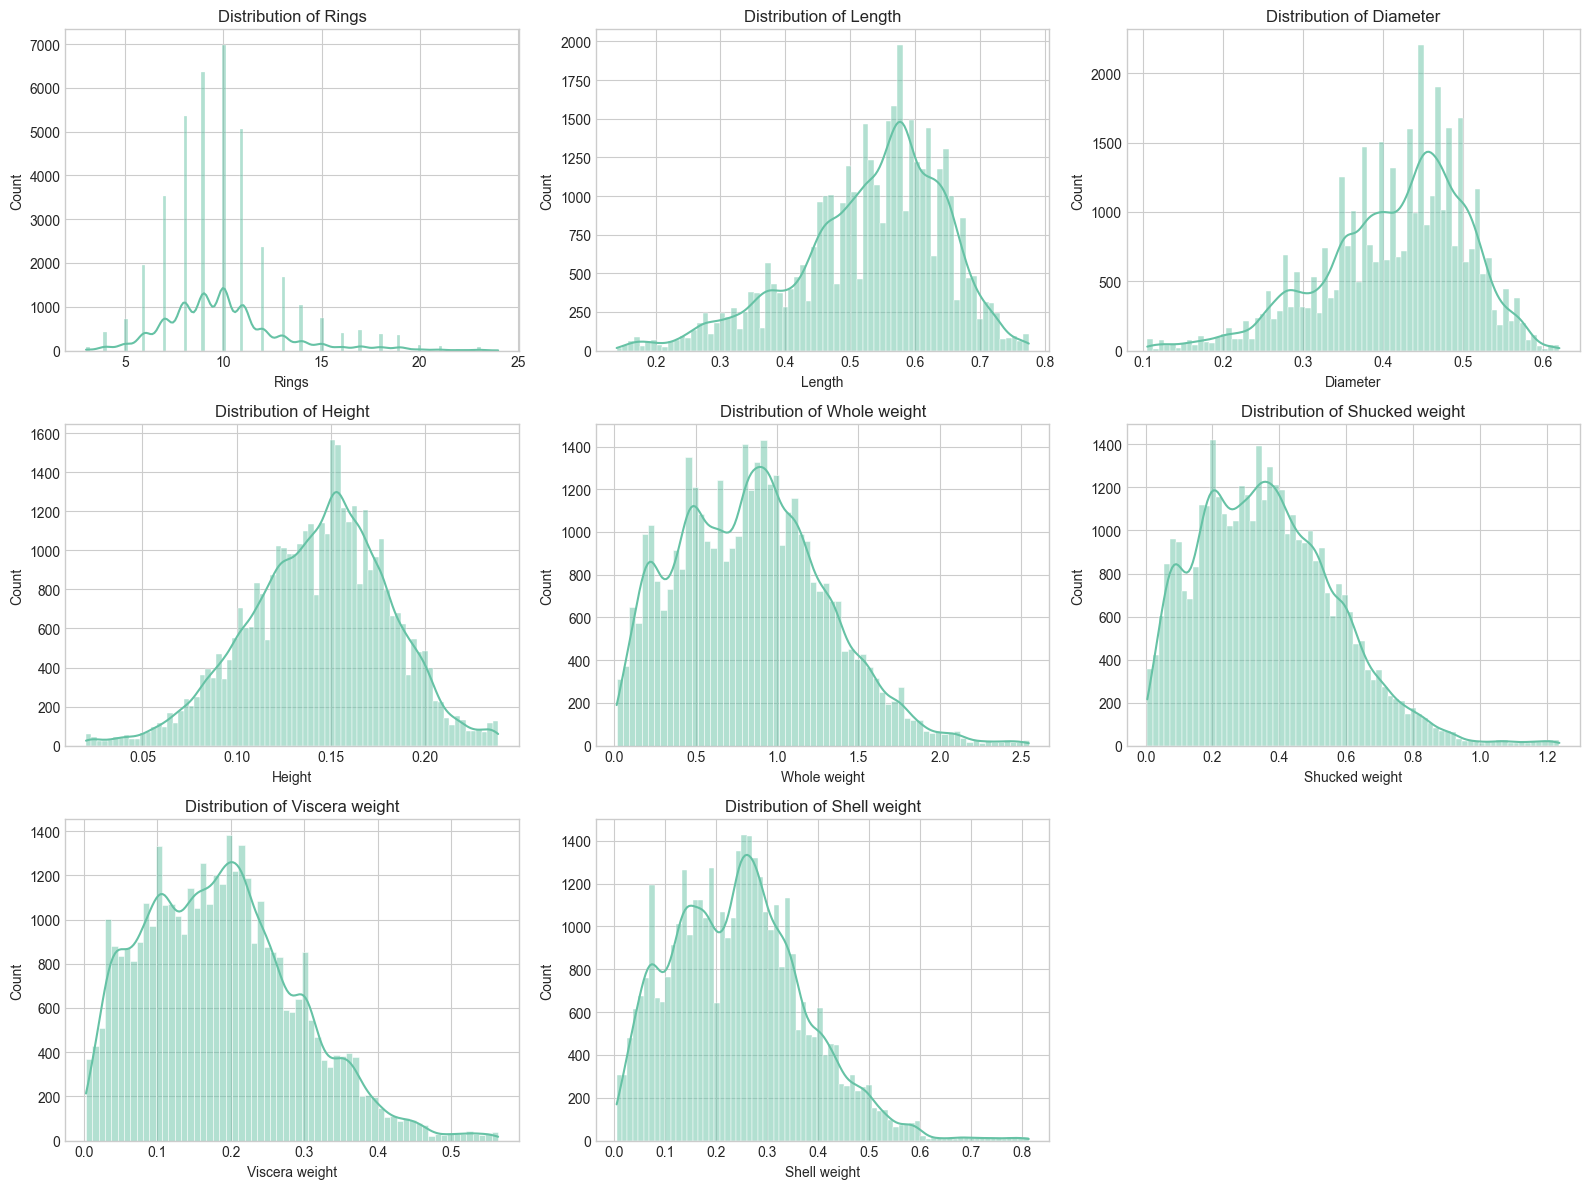

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

# List of columns to plot (excluding 'Sex' and 'Rings')
cols_to_plot = [col for col in abalone.columns if col not in ["Sex", "Rings"]]

# Add Rings to the beginning for the first plot
cols_to_plot = ["Rings"] + cols_to_plot

for i, col in enumerate(cols_to_plot):
    if i < len(axes):
        sns.histplot(abalone[col], kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)

# Remove any empty subplots
for i in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig("plots/all_distributions.png")
plt.show()
plt.close()

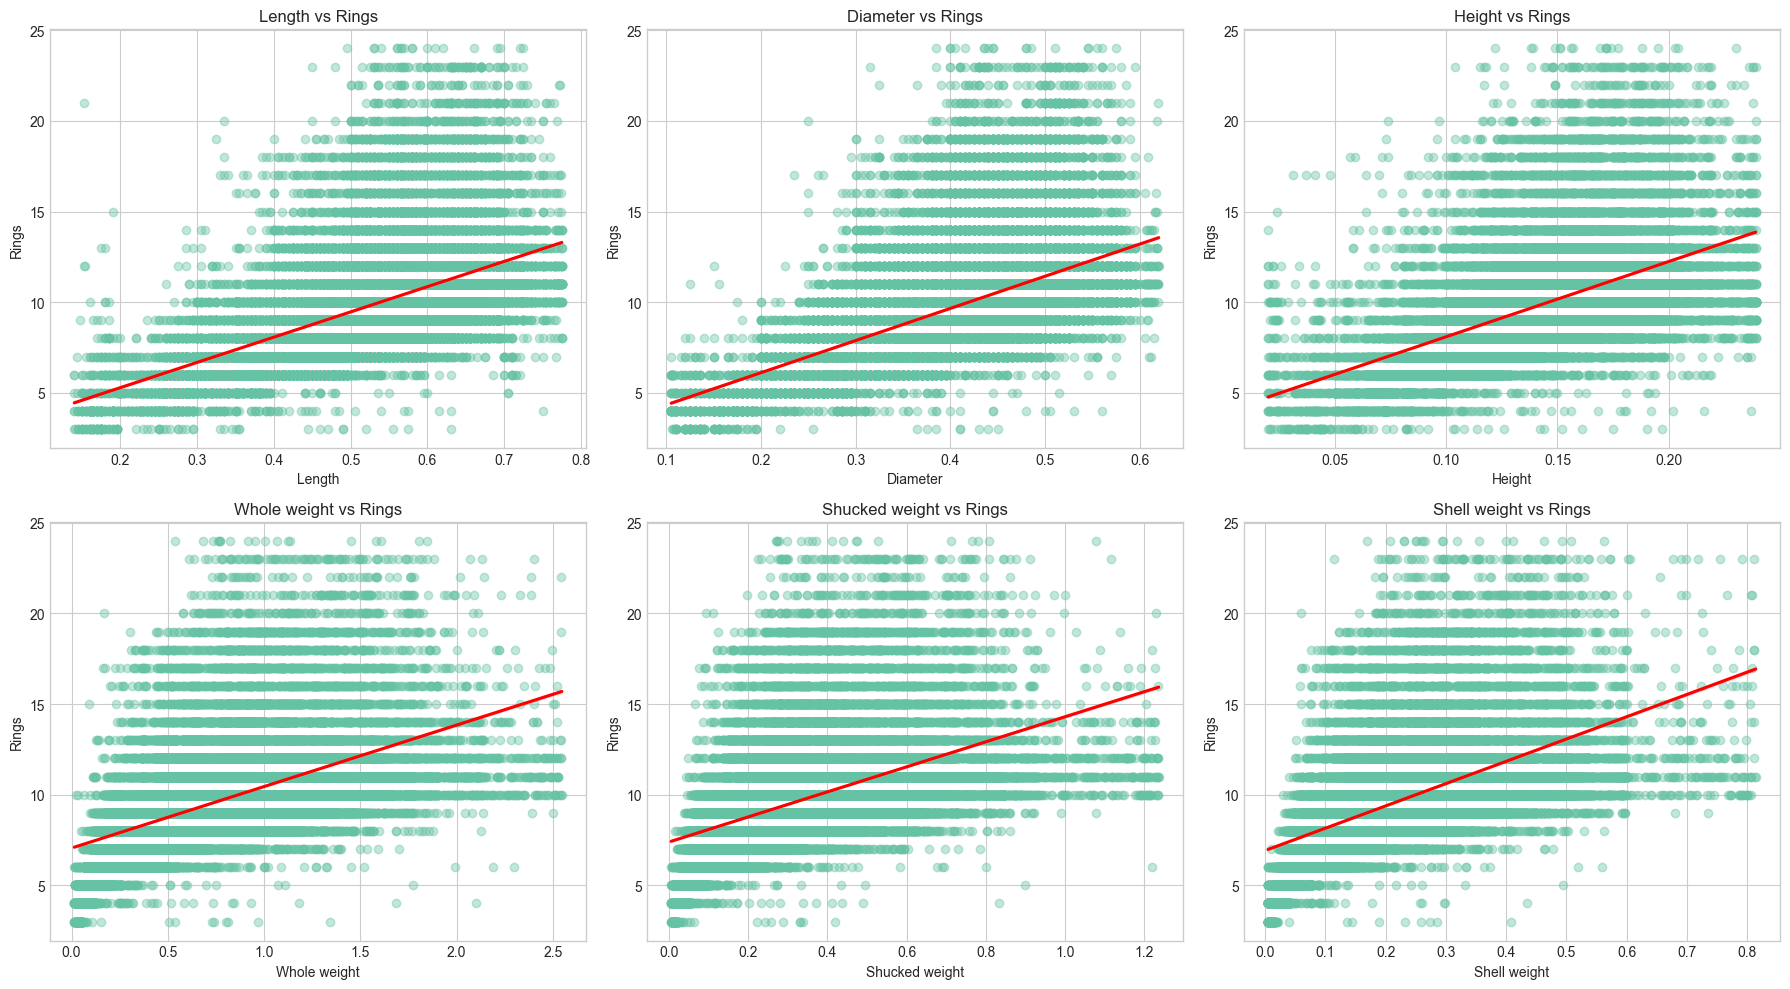

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

features_to_plot = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Shell weight",
]

for i, feature in enumerate(features_to_plot):
    sns.regplot(
        x=feature,
        y="Rings",
        data=abalone,
        ax=axes[i],
        scatter_kws={"alpha": 0.4},
        line_kws={"color": "red"},
    )
    axes[i].set_title(f"{feature} vs Rings")

plt.tight_layout()
plt.savefig("plots/feature_vs_rings.png")
plt.show()
plt.close()

In [17]:
print("\nCorrelation with Rings (Age):")
numerical_cols = abalone.select_dtypes(include=["float64", "int64"]).columns
correlation_with_rings = (
    abalone[numerical_cols].corr()["Rings"].sort_values(ascending=False)
)
print(correlation_with_rings)


Correlation with Rings (Age):
Rings             1.000000
Shell weight      0.540638
Diameter          0.539734
Length            0.533484
Height            0.525842
Whole weight      0.520085
Viscera weight    0.507209
Shucked weight    0.484170
Name: Rings, dtype: float64


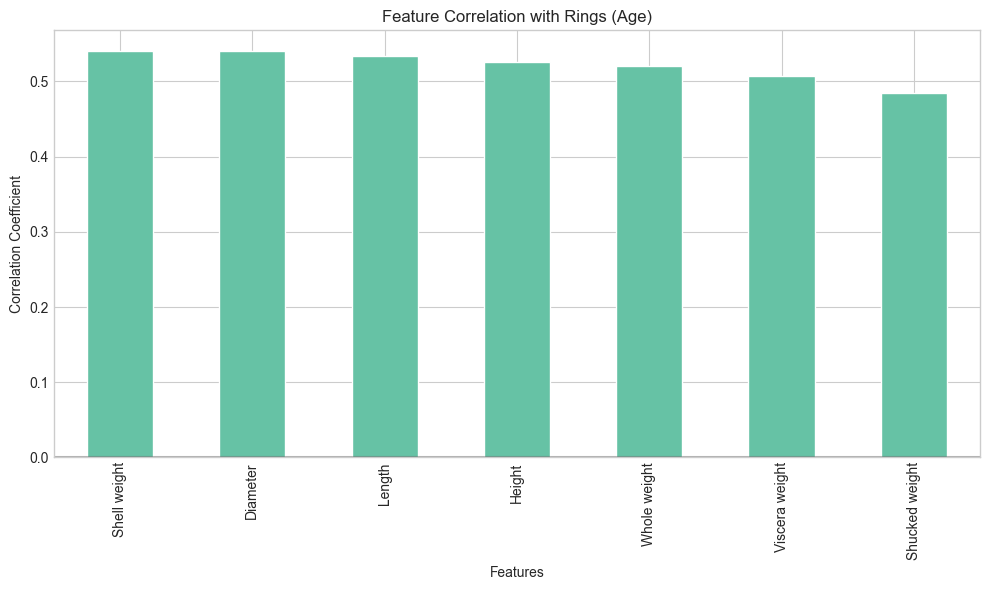

In [18]:
plt.figure(figsize=(10, 6))
correlation_with_rings.drop("Rings").plot(kind="bar")
plt.title("Feature Correlation with Rings (Age)")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.axhline(y=0, color="k", linestyle="-", alpha=0.3)
plt.tight_layout()
plt.savefig("plots/feature_correlation.png")
plt.show()
plt.close()